In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_cam = pd.read_csv("../Dataframe/df_detected_objects_game_neural_acc.csv")

In [9]:
df_cam = df_cam.drop(columns= ["head_x", "head_y", "head_z"], axis=1)

In [10]:
def tennisfeld(r, P1, P2, P3):
    r1 = P2 - P1
    r3 = P3 - 0.5 * (P1 + P2)
    # Basisvektoren
    r1u = r1 / np.sqrt(np.dot(r1, r1))
    r3u = r3 / np.sqrt(np.dot(r3, r3))
    r2u = np.cross(r1u, r3u)
    # Translation
    T0 = P3
    # Rotation
    M1 = np.c_[r1u, r2u, r3u]
    M1_inv = np.linalg.inv(M1)
    # Abbildung
    return np.inner(M1_inv, (r - T0))


def drawTennisField():
    plt.plot([4.11, 4.11], [-11.89, 11.89], 'k', lw=2)  # Single sideline rechts
    plt.plot([5.48, 5.48], [-11.89, 11.89], 'k', lw=2)  # Double sideline rechts
    plt.plot([-4.11, -4.11], [-11.89, 11.89], 'k', lw=2)  # Single sideline links
    plt.plot([-5.48, -5.48], [-11.89, 11.89], 'k', lw=2)  # Double sideline links
    plt.plot([0, 0], [-6.40, 6.40], 'k', lw=2)  # Center Service Line
    plt.plot([-5.48, 5.48], [0, 0], 'k', lw=2)  # Net
    plt.plot([-5.48, 5.48], [11.89, 11.89], 'k', lw=2)  # Baseline oben
    plt.plot([-5.48, 5.48], [-11.89, -11.89], 'k', lw=2)  # Baseline unten
    plt.plot([-4.11, 4.11], [-6.40, -6.40], 'k', lw=2)  # Service Line unten
    plt.plot([-4.11, 4.11], [6.40, 6.40], 'k', lw=2)  # Service Line oben

In [11]:
# Kooridnaten auf dem Tennisfeld als Kalibrierung
P1 = np.array([-4.207, -1.846, 5.733])  # Linke Ecke an der Grundlinie X Seitenlinie Einzelfeld
P2 = np.array([3.415, -1.870, 5.489])  # Rechte Ecke an der Grundlinie X Seitenlinie Einzelfeld
P3 = np.array([-0.057, -1.703, 15.554])  # Mittelpunkt am Netz
df_cam["z"] = df_cam["z"].apply(abs)

In [12]:
df_cam[['new_x', 'new_y', 'new_z']] = df_cam.apply(lambda row: pd.Series(tennisfeld(np.array([row['x'], row['y'], row['z']]), P1, P2, P3)), axis=1)
df_cam.drop(columns=["x", "y", "z"], inplace=True)

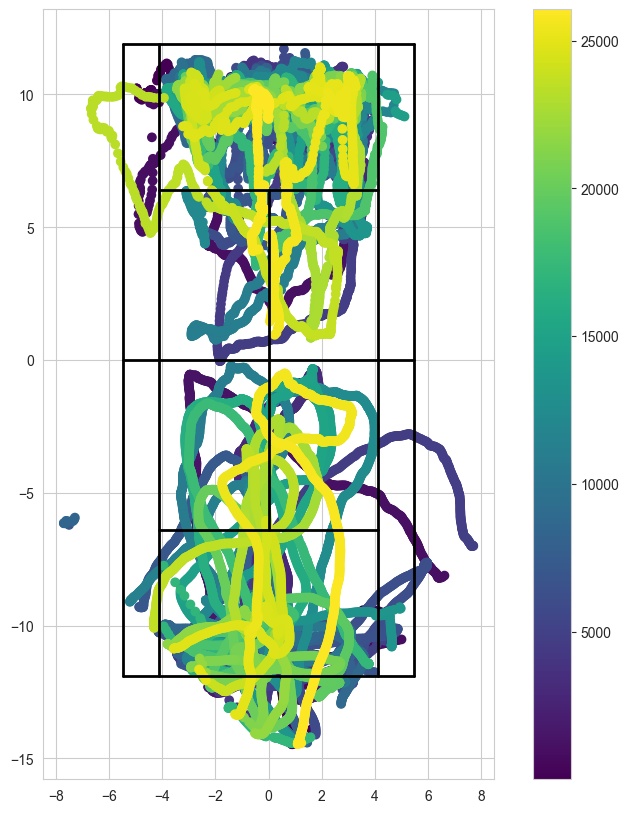

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=df_cam['new_x'], y=df_cam['new_z'], c=df_cam['frame'], cmap='viridis')
drawTennisField()
plt.colorbar()
ax.set_aspect('equal')
plt.show()

In [19]:
df_cam.head(1000)

,frame,object_id,object_label,confidence,tracking_state,vx,xy,vz,width,height,length,new_x,new_y,new_z
0,3,Player1,Person,86.81641,OK,-1.77073,-0.25434,0.53492,0.49612,0.58978,0.49612,1.725736,-2.341429,-13.915025
1,3,Player2,Person,37.93945,OK,0.36981,-0.40576,1.45611,0.50440,1.14110,0.50440,-4.969836,5.485515,10.233041
2,4,Player1,Person,90.82031,OK,-1.57657,-0.20023,0.38638,0.49697,0.59399,0.49697,1.682344,-2.336442,-13.910548
3,4,Player2,Person,30.49316,OK,-0.00561,-0.05862,0.19918,0.50356,1.13775,0.50356,-4.969314,5.485036,10.226811
4,5,Player1,Person,91.16211,OK,-1.44479,-0.16580,0.29399,0.50114,0.59733,0.50114,1.644908,-2.331837,-13.908216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,592,Player1,Person,92.08984,OK,-0.26425,-0.17260,0.54024,1.42820,1.80924,1.42820,-1.575027,-1.552328,-11.039668
996,592,Player2,Person,44.65332,OK,-0.66778,-0.14550,0.37124,0.79892,1.47623,0.79892,1.044748,5.237877,10.591428
997,593,Player1,Person,92.62695,OK,-0.22678,-0.15571,0.48905,1.45135,1.80691,1.45135,-1.570767,-1.549831,-11.036459
998,593,Player2,Person,35.40039,OK,-0.65128,-0.13832,0.34952,0.80521,1.46993,0.80521,1.036362,5.237224,10.587607


In [16]:
df_cam.loc[df_cam.isna().any(axis=1)]

,frame,object_id,object_label,confidence,tracking_state,vx,xy,vz,width,height,length,new_x,new_y,new_z
22532,13586,48,Person,68.94531,OK,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
22534,13587,48,Person,85.74219,OK,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
22536,13588,48,Person,87.69531,OK,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
22538,13589,48,Person,90.67383,OK,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
22540,13590,48,Person,90.91797,OK,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
22542,13591,48,Person,91.65039,OK,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [17]:
df_cam["object_id"] = np.where(df_cam["new_z"] < 0, "Player1", "Player2")

In [18]:
df_cam[df_cam.duplicated(subset=["frame", "object_id"], keep=False)]

,frame,object_id,object_label,confidence,tracking_state,vx,xy,vz,width,height,length,new_x,new_y,new_z
23,16,Player1,Person,92.96875,OK,-3.88788,-0.23776,0.08024,0.58921,0.56075,0.58921,0.903397,-2.164396,-14.464998
24,16,Player1,Person,81.68945,OK,-3.66496,-0.20353,0.00531,2.89639,2.71142,2.89639,3.798369,-3.063609,-9.421773
26,17,Player1,Person,93.60352,OK,-2.89022,-0.21171,0.17973,0.58981,0.56425,0.58981,0.876035,-2.162206,-14.462836
27,17,Player1,Person,81.68945,OK,-3.66498,-0.20326,0.00539,2.92684,2.72573,2.92684,3.674753,-3.058476,-9.418356
29,18,Player1,Person,94.18945,OK,-2.23743,-0.20775,0.28814,0.58996,0.56763,0.58996,0.865216,-2.158619,-14.453071
30,18,Player1,Person,81.68945,OK,-3.66496,-0.20360,0.00529,2.95088,2.74008,2.95088,3.551189,-3.053637,-9.417104
7869,4578,Player1,Person,86.18164,OK,1.62745,-0.85585,3.24004,0.80955,1.74759,0.80955,0.394769,-0.193004,-6.163000
7870,4578,Player1,Person,72.55859,OK,-0.08954,0.55468,-1.91789,0.52059,1.53187,0.52059,-1.834323,2.115519,-0.001647
7871,4579,Player1,Person,88.18359,OK,1.68465,-0.84574,3.21487,0.81235,1.74461,0.81235,0.468568,-0.161293,-6.061634
7872,4579,Player1,Person,73.48633,OK,-0.08538,0.52089,-1.80058,0.53053,1.53403,0.53053,-1.833896,2.111267,-0.011284
